In [64]:
import math
from collections import defaultdict

import pylab
import numpy as np
from sklearn.cluster import KMeans
from skimage import img_as_float
from skimage.io import imread, imsave

In [2]:
image = imread('parrots.jpg')

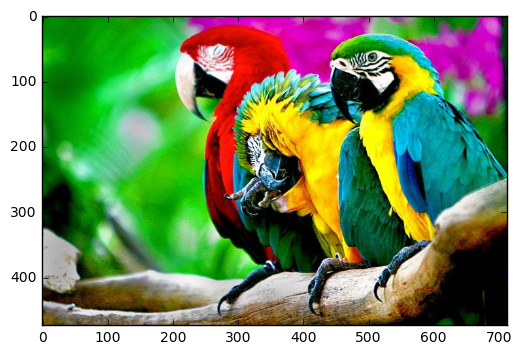

In [7]:
%matplotlib inline
pylab.imshow(image)

In [15]:
converted_image = img_as_float(image)
X = converted_image.reshape((converted_image.shape[0] * converted_image.shape[1], converted_image.shape[2]))

In [69]:
def calc_PSNR(I, K):
    
    def square(I_pixel, K_pixel, i):
        delta = I_pixel[i] - K_pixel[i]
        return delta * delta

    def calc_MSE_RGB(I, K):
        deltas = []
        for i in range(len(I)):
            deltas.append(square(I[i], K[i], 0) + square(I[i], K[i], 1) + square(I[i], K[i], 2))
        return sum(deltas) / len(I) / 3
    
    return -10 * math.log10(calc_MSE_RGB(I, K))

In [ ]:
for n_clusters in range(1, 21):
    clf = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    y = clf.fit_predict(X)

    clusters = defaultdict(list)

    for i, x in enumerate(X):
        clusters[y[i]].append(x)

    colors_mean = {}
    colors_median = {}

    for cluster in clusters:
        r = list(map(lambda x: x[0], clusters[cluster]))
        g = list(map(lambda x: x[1], clusters[cluster]))
        b = list(map(lambda x: x[2], clusters[cluster]))

        colors_mean[cluster] = list(map(np.mean, [r, g, b]))
        colors_median[cluster] = list(map(np.median, [r, g, b]))

    y_mean = list(map(lambda x: colors_mean[x], y))
    y_median = list(map(lambda x: colors_median[x], y))

    mean_image = np.reshape(y_mean, image.shape)
    median_image = np.reshape(y_median, image.shape)

    imsave('mean_image-{}.jpg'.format(n_clusters), mean_image)
    imsave('median_image-{}.jpg'.format(n_clusters), median_image)

    mean_PSNR = calc_PSNR(X, y_mean)
    median_PSNR = calc_PSNR(X, y_median)

    print(mean_PSNR, median_PSNR)